In [4]:
import pandas as pd
import random 
import numpy as np
from numpy import random
from random import randint
import math
from scipy.stats import truncnorm
from matplotlib import pyplot as plt


In [5]:
# get normally distributed numbers between 300-1200

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=(300+1200)/2, sd=100, low=300, upp=1200)
s = X.rvs(5000)
randomInts = np.round(s)
randomInts

array([836., 847., 894., ..., 720., 846., 762.])

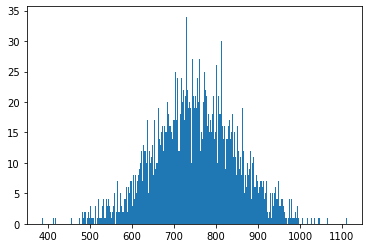

In [6]:
# check normal distribution

axis = np.arange(start=min(s), stop = max(s) + 1)
plt.hist(s, bins = axis)
plt.show()


In [13]:
#create policy table
policy_df = pd.DataFrame()                                                                                                                                                                     
indexNum = list(range(1, 5001))
policy_df["Policy_ID"] = indexNum                                                                                                                               
policy_df["Premiun"] = randomInts                                                                                                                                              
policy_df

,Policy_ID,Premiun
0,1,836.0
1,2,847.0
2,3,894.0
3,4,587.0
4,5,791.0
...,...,...
4995,4996,827.0
4996,4997,775.0
4997,4998,720.0
4998,4999,846.0


In [9]:
#generate random names
import names
name = []
for i in range(5000):
    name.append(names.get_full_name())
    
name[:10]

['Gloria Upshaw',
 'Helen Thornton',
 'Patricia Kath',
 'Margaret Cabrera',
 'Anthony Zimmerman',
 'Elsie Richardson',
 'Dorothy Herring',
 'Jeffrey Meyer',
 'Beverly Larson',
 'Lynn Johnson']

In [17]:
#normally distributed age between 18-99
age_norm = get_truncated_normal(mean=(18+99)/2, sd=10, low=18, upp=99)

#create owner table
dim_owner_df = pd.DataFrame() 
dim_owner_df["Owner_ID"] = indexNum                                                                                                                               
dim_owner_df["Name"] = name
dim_owner_df["Age"] = np.rint(age_norm.rvs(5000))
dim_owner_df["Policy_ID"] = policy_df.Policy_ID
dim_owner_df["Gender"] = np.random.choice(['F','M'], size=5000)  
dim_owner_df


,Owner_ID,Name,Age,Policy_ID,Gender
0,1,Gloria Upshaw,47.0,1,F
1,2,Helen Thornton,57.0,2,F
2,3,Patricia Kath,57.0,3,F
3,4,Margaret Cabrera,49.0,4,M
4,5,Anthony Zimmerman,57.0,5,F
...,...,...,...,...,...
4995,4996,Anthony Downing,58.0,4996,F
4996,4997,Louis Hollander,69.0,4997,F
4997,4998,Gregory Keller,66.0,4998,M
4998,4999,Josiah Quinn,60.0,4999,F


In [ ]:
#generate random address
import names
address = []
city = []
state = []
zip = []
for i in range(5000):
    name.append(names.get_full_name())
    
name[:10]

In [11]:
#create location table
dim_location_df = pd.DataFrame()                                                                                                                                                                     
dim_location_df["Location_ID"] = indexNum                                                                                                                               
dim_location_df["Address"] = 
dim_location_df["City"] = 
dim_location_df["State"] = 
dim_location_df["Zip"] = 
dim_location_df["Policy_ID"] = policy_df.Policy_ID
dim_location_df

SyntaxError: invalid syntax (<ipython-input-11-f06e33549ca8>, line 4)

In [12]:
#create time table
dim_time_df = pd.DataFrame() 
dim_time_df["Time_ID"] = indexNum                                                                                                                               
dim_time_df["Day"] = random.randint(1,31,size=5000)
dim_time_df["Month"] = random.randint(1,12,size=5000)
dim_time_df["Year"] = np.random.choice(['2019','2020'], size=5000)
dim_time_df["Policy_ID"] = policy_df.Policy_ID
dim_time_df

,Time_ID,Day,Month,Year,Policy_ID
0,1,30,10,2020,1
1,2,18,5,2019,2
2,3,30,9,2019,3
3,4,19,2,2020,4
4,5,1,8,2020,5
...,...,...,...,...,...
4995,4996,3,4,2020,4996
4996,4997,10,3,2020,4997
4997,4998,9,9,2020,4998
4998,4999,17,6,2019,4999
